## Zadanie niepunktowane

Zaimplementować funkcję `normalize_log_posterior`. Funkcja przyjmuje tablicę `unnormalized` o wymiarach $M\times K$. Element o współrzędnych $m,k$ reprezentuje nieznormalizowane $\ln[p(y=c_k\mid x_m)]$. Jej zadaniem jest znormalizować każdy wiersz tak, aby prawdopodobieństwa sumowały się do jedynki. Normalizacja musi być stabilna numerycznie (to jest główna motywacja - stabilne obliczenie log posteriora bez konieczności przeliczania mianownika we wzorze Bayesa).

Zaimplementować klasy `BernoulliNaiveBayes` oraz `GaussianNaiveBayes`.

Uczenie przebiega w metodzie `__init__`:
  * `X` to dwuwymiarowa tablica wektorów poziomych $\mathbf{x}$ - wymiar to $N\times D$,
  * `y` to jednowymiarowa tablica int'ów, które reprezentują klasy - długość to $N$.

Metoda `log_likelihood` przyjmuje tablicę `X` o wymiarach $M\times D$ i zwraca tablicę log likelihoodów kolejnych $K$ klas o wymiarach $M\times K$.

Metoda `predict_logits` przyjmuje tablicę `X` o wymiarach $M\times D$ i zwraca tablicę wartości log posterior (_logits_) kolejnych $K$ klas o wymiarach $M\times K$. Ta metoda powinna korzystać z `log_likelihood` oraz `normalize_logposterior`.

Metoda `predict` przyjmuje tablicę `X` o wymiarach $M\times D$ i zwraca tablicę najprawdopodobniejszych klas (int) o długości $M$.

Metoda `generate` ma zwrócić jeden losowo wygenerowany przykład z klasy `k`. Powinna ona być seedowana parametrem `seed`.

W prawdziwych zastosowaniach chcielibyśmy, aby klasa `BernoulliNaiveBayes` działała też na macierzach rzadkich - tutaj możemy dla uproszczenia założyć, że wszystkie macierze będą gęste.

In [1]:
import numpy as np

def normalize_log_posterior(unnormalized):
    # stabilinie numererycznie
    result = unnormalized.copy()
    result -= result.max(size=1).reshape(-1, 1)
    np.exp(result).sum()
    # normalizacja logarytmow to odjecie stalej
    # biore maximum z kazdego wiersza i odejmuje od wszystkich pozostalych 
    # UZUPEŁNIĆ
    # bayies jako base line i punkt odniesienia dla bardziej zlozonych modeli
    # szybkosc i prostota oraz interpretowalnosc
    # spodziewamy sie ze dla tego modelu bedzie najgorszy model
    # mozna uzywac KNN - jednak on musi zapamietac wszystkie przyklady treningowe
    # pozniej sa regresje logistyczne i liniowe 
    # pozniej drzewa i sieci
    
    

class BernoulliNaiveBayes:
    # petle po K - im mniej iteracji tym lepiej 
    def __init__(self, X, y):
        K = int(y.max() + 1)
        assert set(y) == set(np.arange(K))
        # UZUPEŁNIĆ
        # ilosci y w train_secie
        self.priors = set(np.arange(K)) 
        D = X.shape[1]
        self.likelihoods = np.zeros((K, D))
        for k in range(K):
            self.priors[k] = (y=k).sum()/K
        #np.bincount
        # D - cechy
        # K - klasy
        for k in range(K):
            idx = y==k
            x = X[idx]
            self.likehoods[k] = x.sum(axes=0) / x.shape[0]
            
    def log_likelihood(self, X):
        M = X.shape[0]
        K = self.likelihoods.shape[0]
        result = np.zeros((M, K))
        # korzystamy z naiwnego zalozenia 
        # ze kazda cecha jest niezalezna od siebie i zalezy od y 
        # likelihood dla danej klasy 
        for k in range(K):
            l = self.likelihood[k]
            result[:, k] = np.log(x * l.reshape(1, -1) + (1 - X) * (1 - l.reshape(1, -1))).sum(axis=1)
        return result
        
        # logits
        # dla kazdego wiersza ma nam zwrocic 
        # UZUPEŁNIĆ

    def predict_logits(self, X):
        M = X.shape[0]
        K = self.likelihoods.shape[0]
        result = np.zeros((M,K))
        result += np.log(self.prior).reshape(1, -1)
        result += self.loglikehood[X]
        return normalize_log_posterior(result) 
        
        # exp (p).sum = 1 
    def predict(self, X):
        return np.argmax[self.predict_logits(X). axis=1]
        # UZUPEŁNIĆ
        # zrobic sobie kurs numpy 
    def generate(self, k, seed):
        np.random.RandomState()
        self.likelihood[k]
        # UZUPEŁNIĆ

class GaussianNaiveBayes:

    def __init__(self, X, y):
        _epsilon_sigma2 = 1e-6
        K = int(y.max() + 1)
        assert set(y) == set(np.arange(K))
        # UZUPEŁNIĆ
        self.priors = ...        
        self.mu = ...
        self.sigma2 = ...

    def log_likelihood(self, X):
        # UZUPEŁNIĆ

    def predict_logits(self, X):
        # UZUPEŁNIĆ

    def predict(self, X):
        # UZUPEŁNIĆ

    def generate(self, k, seed):
        # UZUPEŁNIĆ

IndentationError: expected an indented block (<ipython-input-1-7c816d8c176d>, line 6)

### Newsgroups text dataset

Opis datasetu: http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset

Filtrowanie tekstu: http://scikit-learn.org/stable/datasets/index.html#filtering-text-for-more-realistic-training

Konwersja tekstu do tabelki feature'ów: http://scikit-learn.org/stable/datasets/index.html#converting-text-to-vectors

Użyjemy prostszej klasy `CountVectorizer`: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
print("newsgroups.data")
print("type:", type(newsgroups.data), "; length:", len(newsgroups.data), "; dtype:", type(newsgroups.data[0]))
print("newsgroups.target")
print("type:", type(newsgroups.target), "; shape:", newsgroups.target.shape, "; dtype:", newsgroups.target.dtype)

newsgroups.data
type: <class 'list'> ; length: 11314 ; dtype: <class 'str'>
newsgroups.target
type: <class 'numpy.ndarray'> ; shape: (11314,) ; dtype: int64


In [3]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
n = 43
print("Class:", newsgroups.target[n])
print("Class label:", newsgroups.target_names[newsgroups.target[n]])
print(newsgroups.data[n])

Class: 9
Class label: rec.sport.baseball
For the second straight game, California scored a ton of late runs to crush
the Brewhas. It was six runs in the 8th for a 12-5 win Monday and five in
the 8th and six in the 9th for a 12-2 win yesterday. Jamie Navarro pitched
seven strong innings, but Orosco, Austin, Manzanillo and Lloyd all took part
in the mockery of a bullpen yesterday. How's this for numbers? Maldanado has
pitched three scoreless innings and Navarro's ERA is 0.75. The next lowest
on the staff is Wegman at 5.14. Ouch!

It doesn't look much better for the hitters. Hamilton is batting .481, while
Thon is hitting .458 and has seven RBI. The next highest is three. The next
best hitter is Jaha at .267 and then Vaughn, who has the team's only HR, at
.238. Another ouch. Looking at the stats, it's not hard to see why the team
is 2-5. In fact, 2-5 doesn't sound bad when you're averaging three runs/game
and giving up 6.6/game. 

Still, it's early and things will undoubtedly get better. 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer(max_df=.05, max_features=512) # PROSZĘ POTESTOWAĆ INNE WARTOŚCI 'max_df'
cv.fit(newsgroups.data)
X = cv.transform(newsgroups.data).toarray()
X[X>0] = 1
y = newsgroups.target

_d = {v: k for k, v in cv.vocabulary_.items()}
vector_vocabulary = np.array([_d[i] for i in range(len(_d))])

X_tr, X_te, y_tr, y_te = train_test_split(X, y)

bnb = BernoulliNaiveBayes(X_tr, y_tr)
print("training accuracy: {}".format((bnb.predict(X_tr)==y_tr).mean()))
print("test accuracy: {}".format((bnb.predict(X_te)==y_te).mean()))

training accuracy: 0.5038302887448438
test accuracy: 0.4209968186638388


In [6]:
vector_vocabulary[np.where(bnb.generate(k=0, seed=43))[0]] # alt.atheism

array(['bad', 'based', 'book', 'comes', 'effect', 'error', 'example',
       'full', 'given', 'jewish', 'means', 'needs', 'religion', 'send',
       'start', 'statement', 'thought', 'times', 'view', 'war', 'yes'],
      dtype='<U14')

### MNIST

In [7]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X /= 255
y = y.astype(np.int)

In [8]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)
gnb = GaussianNaiveBayes(X_tr, y_tr)

In [9]:
# U MNIE TO SIĘ LICZY OKOŁO PÓŁ MINUTY
print("training accuracy: {}".format((gnb.predict(X_tr)==y_tr).mean()))
print("test accuracy: {}".format((gnb.predict(X_te)==y_te).mean()))

training accuracy: 0.6384380952380952
test accuracy: 0.6304


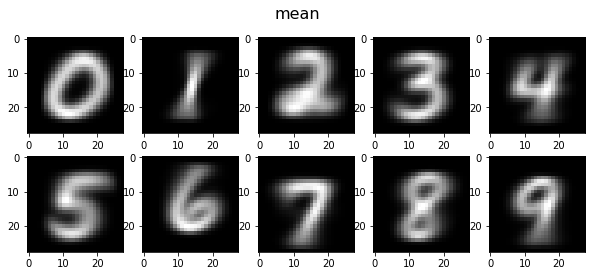

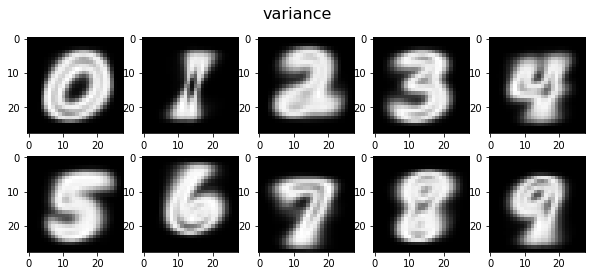

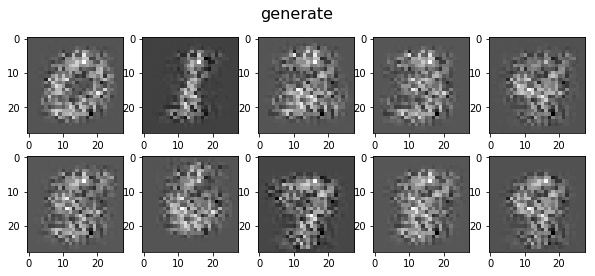

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,4))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(gnb.mu[i].reshape(28,28).astype(np.float64), cmap="gray")
fig.suptitle("mean", fontsize=16)

fig = plt.figure(figsize=(10,4))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(gnb.sigma2[i].reshape(28,28).astype(np.float64), cmap="gray")
fig.suptitle("variance", fontsize=16)

fig = plt.figure(figsize=(10,4))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(gnb.generate(k=i, seed=43).reshape(28,28).astype(np.float64), cmap="gray")
_ = fig.suptitle("generate", fontsize=16)